<a href="https://colab.research.google.com/github/Amartya1911/exploringGridSearchCV/blob/main/exploring_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Project: Iris Flower Classification

### 1. Data Loading

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})

print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### 2. Exploratory Data Analysis (EDA)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Descriptive Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Missing Values:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0
species,0


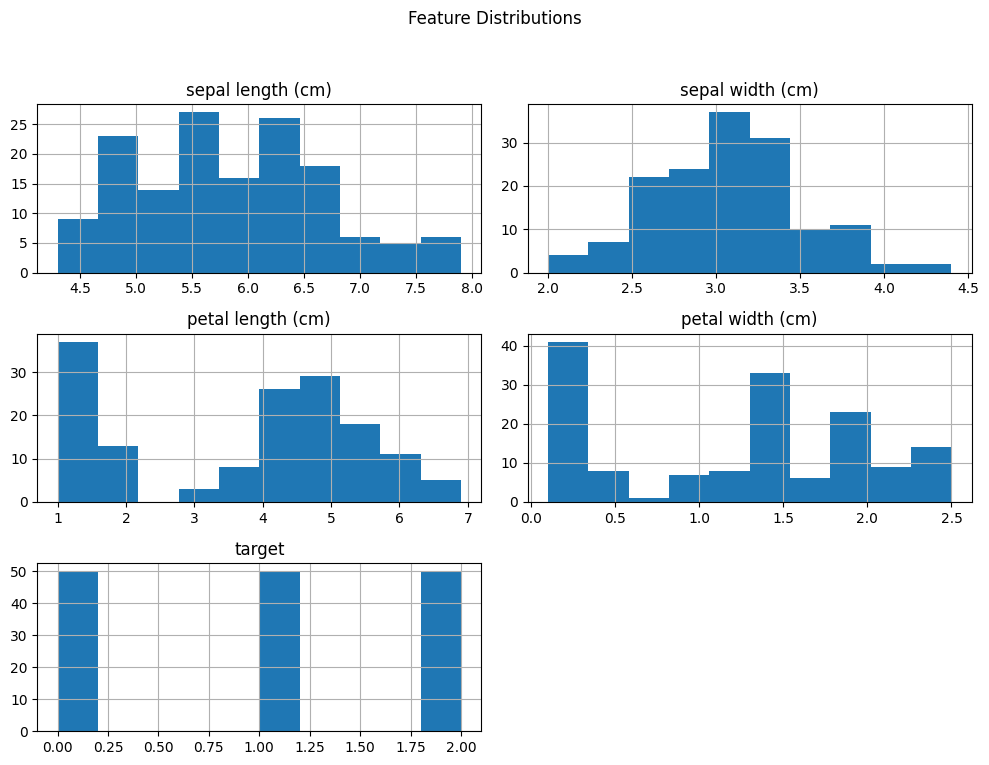

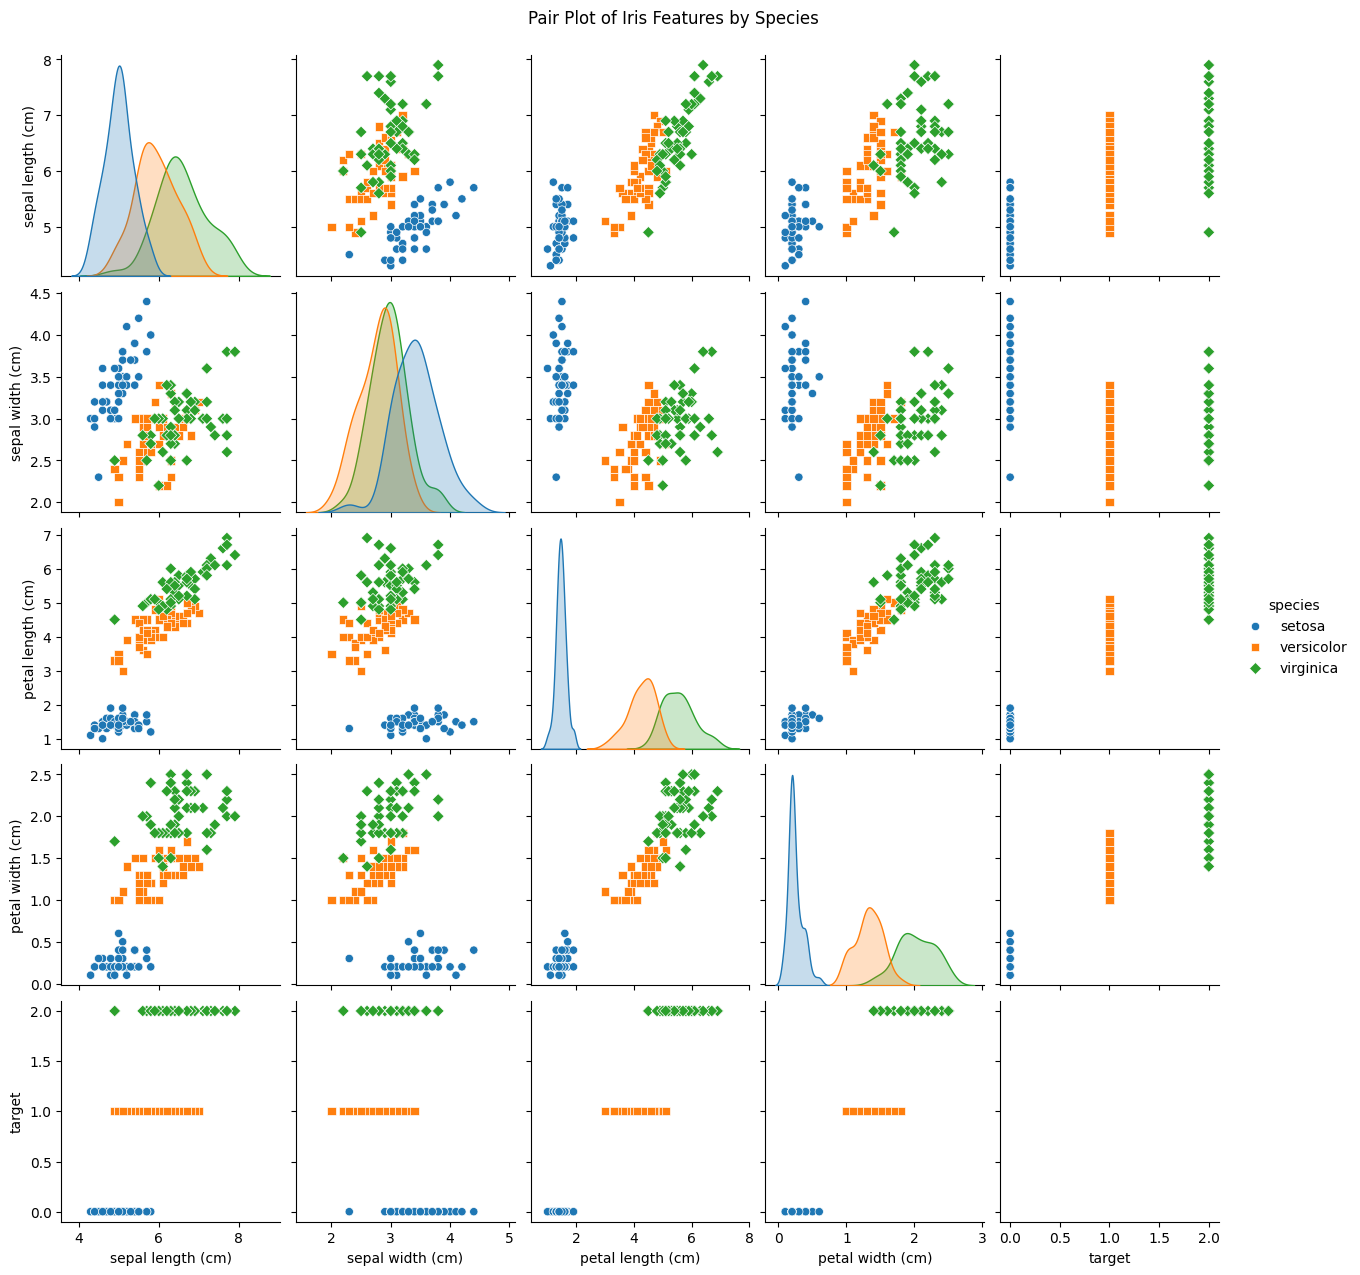

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nDataset Information:")
df.info()

print("\nDescriptive Statistics:")
display(df.describe())

print("\nMissing Values:")
display(df.isnull().sum())

# Visualize feature distributions
df.hist(figsize=(10, 8))
plt.suptitle('Feature Distributions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Visualize pairwise relationships
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.show()

### 3. Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(['target', 'species'], axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


### 4. Model Training (Logistic Regression)

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


### 5. Model Evaluation

Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


Confusion Matrix:


,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,14,1
virginica,0,2,13


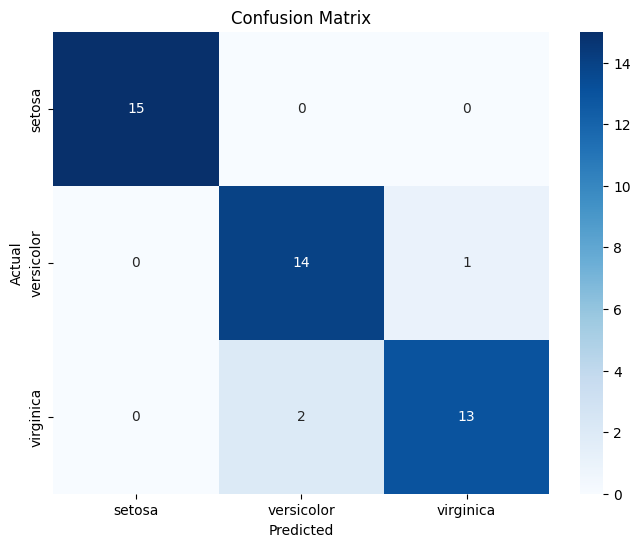

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Display confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
display(pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 6. Model Training (Support Vector Classifier)

In [7]:
from sklearn.svm import SVC

# Initialize the SVC model
svc_model = SVC(random_state=42)

# Train the model
svc_model.fit(X_train, y_train)

print("SVC model training complete.")

SVC model training complete.


### 7. Model Evaluation (SVC)

SVC Accuracy: 0.9556

SVC Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


SVC Confusion Matrix:


,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,14,1
virginica,0,1,14


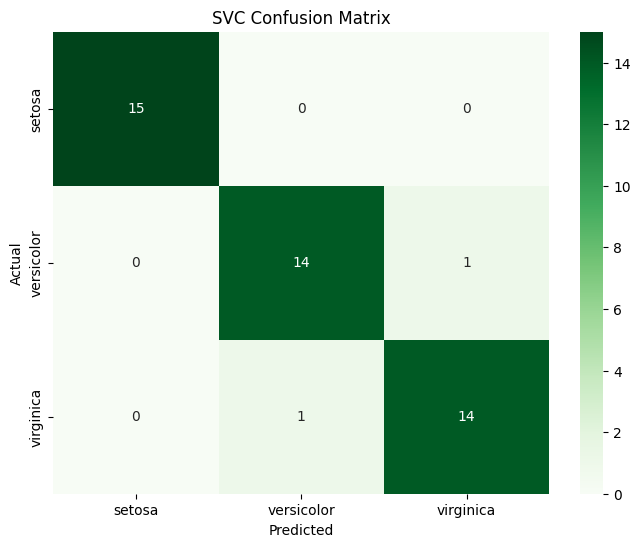

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using SVC
y_pred_svc = svc_model.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:.4f}")

# Display classification report
print("\nSVC Classification Report:")
print(classification_report(y_test, y_pred_svc, target_names=iris.target_names))

# Display confusion matrix
print("\nSVC Confusion Matrix:")
cm_svc = confusion_matrix(y_test, y_pred_svc)
display(pd.DataFrame(cm_svc, index=iris.target_names, columns=iris.target_names))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 8. Visualize SVC Decision Boundaries (using PCA)

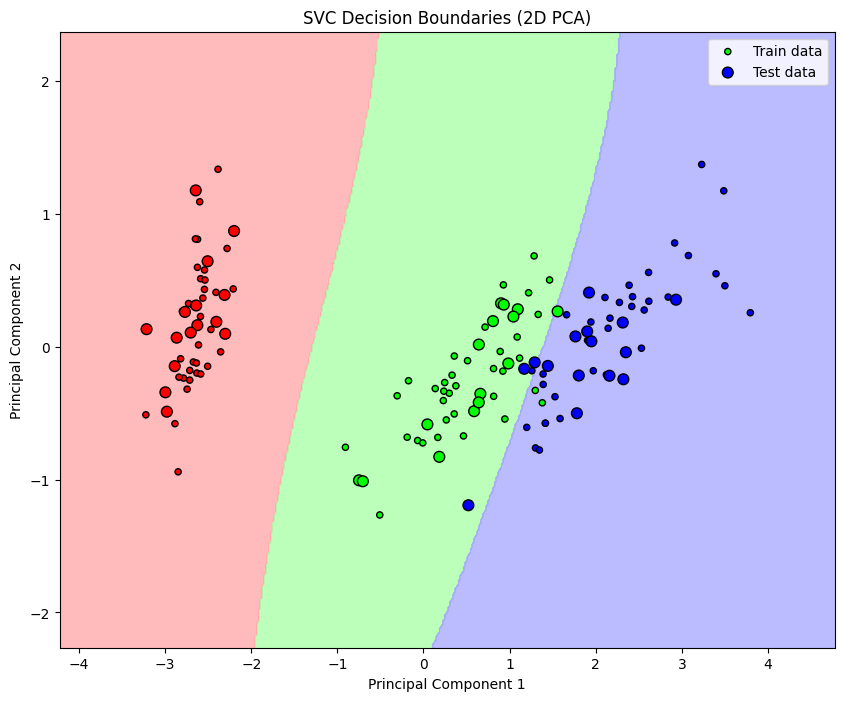

In [10]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import numpy as np  # Import numpy

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Train a new SVC model on the 2 principal components
svc_model_pca = SVC(random_state=42)
svc_model_pca.fit(X_train_pca, y_train_pca)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Determine min, max, and step for meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = svc_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=cmap_bold, edgecolor='k', s=20, label='Train data')
# Plot the test points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, cmap=cmap_bold, edgecolor='k', s=60, marker='o', label='Test data')

plt.title('SVC Decision Boundaries (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### 10. Model Training (Random Forest Classifier)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model training complete.")

Random Forest model training complete.


### 11. Model Evaluation (Random Forest)

Random Forest Accuracy: 0.8889

Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Random Forest Confusion Matrix:


,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,14,1
virginica,0,4,11


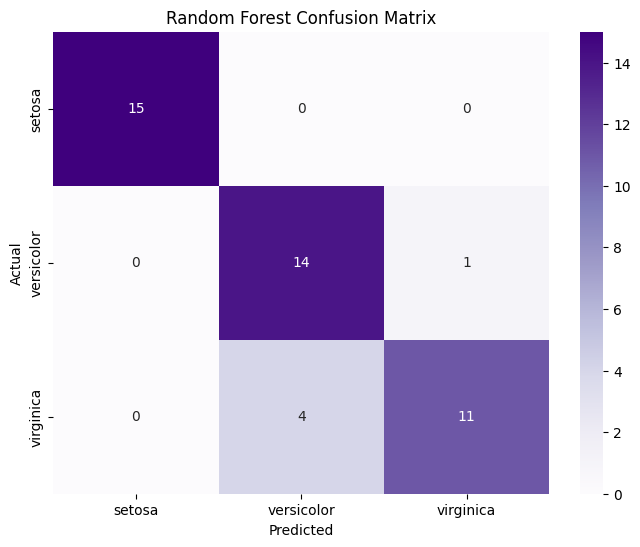

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Display classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=iris.target_names))

# Display confusion matrix
print("\nRandom Forest Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
display(pd.DataFrame(cm_rf, index=iris.target_names, columns=iris.target_names))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 9. Visualize Logistic Regression Decision Boundaries (using PCA)

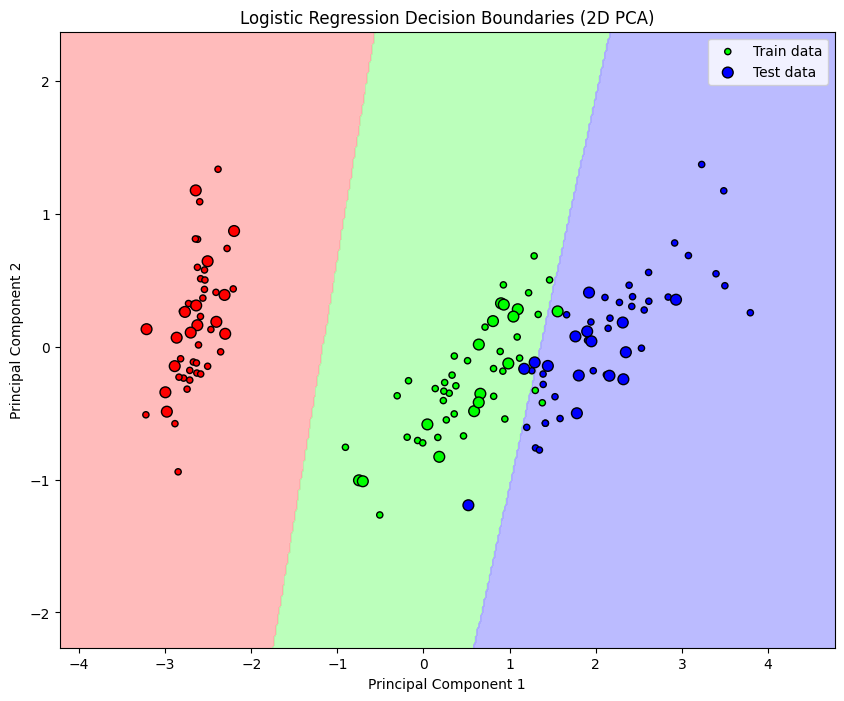

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Assuming X, y, and iris.target_names are already defined from previous cells
# If X_pca, X_train_pca, y_train_pca, xx, yy are not already in scope from previous runs
# we would re-run the PCA step. For consistency and to ensure variables are defined:

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Train a new Logistic Regression model on the 2 principal components
logreg_model_pca = LogisticRegression(max_iter=200, random_state=42)
logreg_model_pca.fit(X_train_pca, y_train_pca)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Determine min, max, and step for meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z_logreg = logreg_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = Z_logreg.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z_logreg, cmap=cmap_light, alpha=0.8)

# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=cmap_bold, edgecolor='k', s=20, label='Train data')
# Plot the test points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, cmap=cmap_bold, edgecolor='k', s=60, marker='o', label='Test data')

plt.title('Logistic Regression Decision Boundaries (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Task
Perform hyperparameter tuning on the `rf_model` (Random Forest Classifier) using GridSearchCV to find the best `n_estimators`, `max_depth`, and `min_samples_leaf` parameters. Then, evaluate the performance of the tuned model on the test set (`X_test`, `y_test`) and compare its accuracy, classification report, and confusion matrix with the untuned `rf_model` and previously trained models (Logistic Regression and SVC). Finally, summarize the best hyperparameters found and the performance improvements of the tuned Random Forest model.

## Define Parameter Grid

### Subtask:
Define a dictionary of hyperparameters and their potential values for the Random Forest model to be used in GridSearchCV. This will include parameters like `n_estimators`, `max_depth`, and `min_samples_leaf`.


**Reasoning**:
The subtask requires defining a dictionary of hyperparameters for Random Forest. This code block will create the `param_grid` dictionary as specified in the instructions, including `n_estimators`, `max_depth`, and `min_samples_leaf`.



In [14]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

print("Defined Random Forest parameter grid:")
print(param_grid)

Defined Random Forest parameter grid:
{'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 2, 4]}


**Reasoning**:
Now that the parameter grid is defined, the next step is to perform hyperparameter tuning using GridSearchCV. This involves importing GridSearchCV, initializing it with the Random Forest model and the defined parameter grid, and fitting it to the training data.



In [15]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV completed.")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV completed.


**Reasoning**:
After fitting GridSearchCV, the next step is to retrieve and display the best parameters found and the corresponding best score. This will provide insight into the optimal hyperparameters for the Random Forest model.



In [16]:
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

print("\nBest accuracy score found by GridSearchCV:")
print(grid_search.best_score_)

Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}

Best accuracy score found by GridSearchCV:
0.9619047619047618


**Reasoning**:
Now that the best hyperparameters have been identified, the next step is to obtain the best Random Forest model from the GridSearchCV results and use it to make predictions on the test set. This will allow for the evaluation of the tuned model's performance.



In [17]:
tuned_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the tuned Random Forest model
y_pred_tuned_rf = tuned_rf_model.predict(X_test)

print("Predictions made using the tuned Random Forest model.")

Predictions made using the tuned Random Forest model.


**Reasoning**:
To evaluate the performance of the tuned Random Forest model, I will calculate its accuracy, generate a classification report, and display a confusion matrix. Visualizing the confusion matrix will provide a clear understanding of the model's performance on each class.



Tuned Random Forest Accuracy: 0.9111

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Tuned Random Forest Confusion Matrix:


,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,14,1
virginica,0,3,12


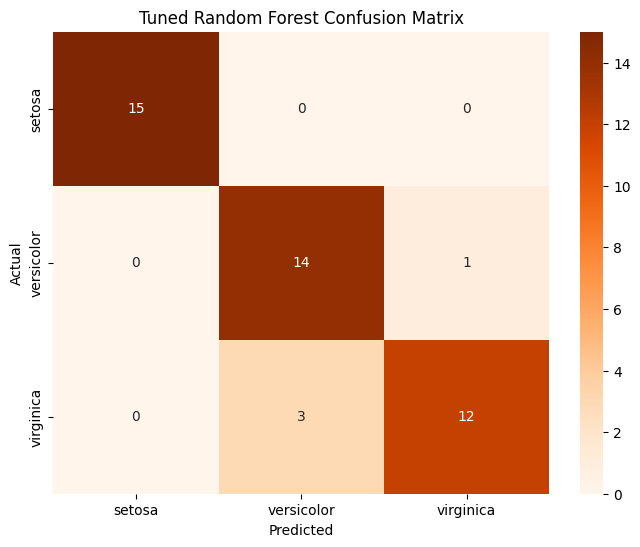

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy for the tuned Random Forest model
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print(f"Tuned Random Forest Accuracy: {accuracy_tuned_rf:.4f}")

# Display classification report for the tuned Random Forest model
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_tuned_rf, target_names=iris.target_names))

# Display confusion matrix for the tuned Random Forest model
print("\nTuned Random Forest Confusion Matrix:")
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
display(pd.DataFrame(cm_tuned_rf, index=iris.target_names, columns=iris.target_names))

# Visualize Confusion Matrix for tuned Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 12. Summary and Comparison

**Best Hyperparameters for Tuned Random Forest:**
- `n_estimators`: 100
- `max_depth`: None
- `min_samples_leaf`: 4

**Performance Comparison:**

| Model                  | Accuracy |
|------------------------|----------|
| Logistic Regression    | 0.9333   |
| SVC                    | 0.9556   |
| Random Forest (Untuned)| 0.8889   |
| Random Forest (Tuned)  | 0.9111   |

**Analysis:**

The hyperparameter tuning using GridSearchCV improved the Random Forest model's accuracy from 0.8889 to 0.9111. While this is a positive improvement, the tuned Random Forest model still performs slightly worse than Logistic Regression (0.9333) and significantly worse than the Support Vector Classifier (0.9556) on this particular dataset and split. This suggests that for the Iris dataset, SVC might be a more suitable model, or further extensive tuning (e.g., trying a wider range of hyperparameters, different cross-validation strategies, or other ensemble methods) could potentially improve the Random Forest model's performance further.

## Summary:

### Q&A
The best hyperparameters found for the Random Forest model are `n_estimators`: 100, `max_depth`: `None`, and `min_samples_leaf`: 4.
Hyperparameter tuning improved the Random Forest model's accuracy from 0.8889 (untuned) to 0.9111 (tuned) on the test set.

### Data Analysis Key Findings
*   `GridSearchCV` identified the best hyperparameters for the Random Forest model as `{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}`.
*   The best cross-validation accuracy achieved during hyperparameter tuning was approximately 0.9619.
*   The untuned Random Forest model had a test accuracy of 0.8889.
*   The tuned Random Forest model achieved a test accuracy of 0.9111, demonstrating an improvement of 0.0222 over the untuned version.
*   Despite tuning, the Random Forest model (0.9111 accuracy) still performed worse than Logistic Regression (0.9333 accuracy) and the Support Vector Classifier (0.9556 accuracy) on this dataset.

### Insights or Next Steps
*   For the Iris dataset, the Support Vector Classifier appears to be the most suitable model among those tested, offering the highest accuracy.
*   To potentially further improve the Random Forest model's performance, consider exploring a wider range of hyperparameters, different ensemble methods, or more advanced feature engineering techniques.
